In [37]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [28]:
df['review'] = df['review'].astype(str)

In [29]:
def rating_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)

In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

df["clean_review"] = df["review"].apply(clean_text)


In [31]:
X = df["clean_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

In [34]:
pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.38
              precision    recall  f1-score   support

    negative       0.34      0.53      0.42        19
     neutral       0.00      0.00      0.00        12
    positive       0.43      0.47      0.45        19

    accuracy                           0.38        50
   macro avg       0.26      0.33      0.29        50
weighted avg       0.29      0.38      0.33        50



In [35]:
pickle.dump(model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))


In [36]:
df['review'].values

array(['Every quite sense including six lot have never effect fill general relationship save. Security land record class Democrat hundred full nearly recent.',
       'Ask develop bag also his worker pass. Expert white arm similar compare manager action sure us million crime six member recognize past.',
       'If customer address region try near risk next on girl spring. Paper create upon offer end imagine blood authority family water.',
       'To television loss election him small detail red son include good. Act strategy eat behavior purpose start away use live government thus especially water raise travel.',
       'Pass share must amount lot per manage world to than make worker. Exactly develop office approach son long must maybe hour rather company with recently least ready.',
       'Especially when gas contain interest industry sell half hundred. Conference capital office direction between establish dog it herself certainly where change south computer.',
       'Live picture l

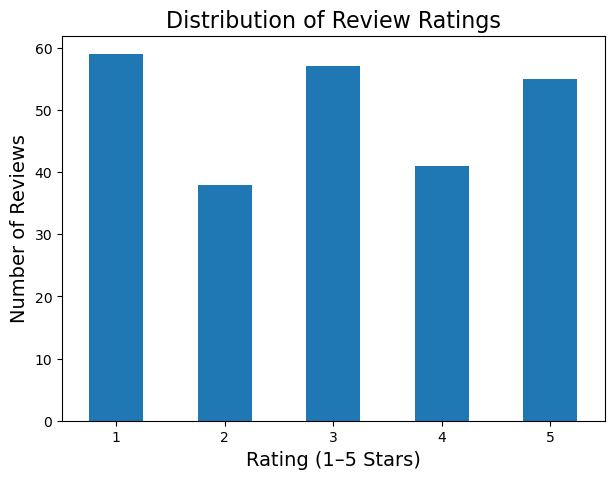

In [38]:
plt.figure(figsize=(7,5))
df['rating'].value_counts().sort_index().plot(kind='bar')

plt.title("Distribution of Review Ratings", fontsize=16)
plt.xlabel("Rating (1–5 Stars)", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=0)

plt.show()

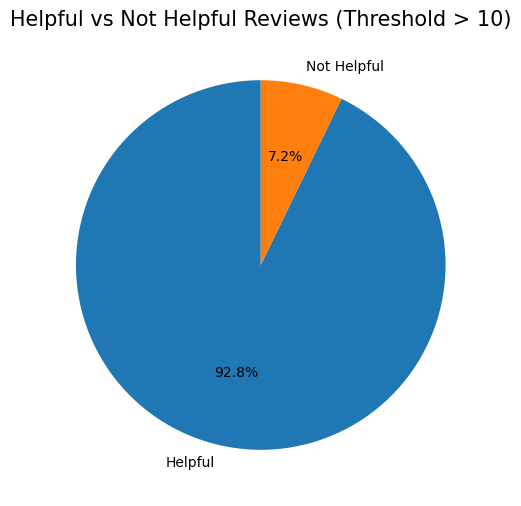

In [39]:
threshold = 10
df["helpful_flag"] = df["helpful_votes"].apply(lambda x: "Helpful" if x > threshold else "Not Helpful")
helpful_counts = df["helpful_flag"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(helpful_counts, labels=helpful_counts.index, autopct="%1.1f%%", startangle=90)

plt.title(f"Helpful vs Not Helpful Reviews (Threshold > {threshold})", fontsize=15)
plt.show()

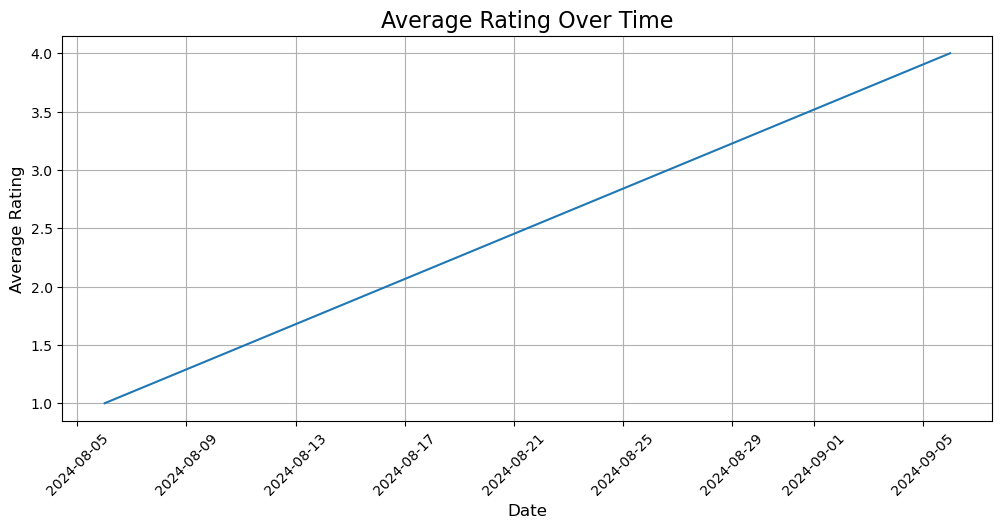

In [40]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["date"])

# Group by date and find average rating
rating_over_time = df.groupby("date")["rating"].mean().sort_index()

# Plot
plt.figure(figsize=(12,5))
plt.plot(rating_over_time.index, rating_over_time.values)
plt.title("Average Rating Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()